In [174]:
import numpy as np
from qiskit import QuantumCircuit, transpile, QuantumRegister
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


In [175]:
circuit = QuantumCircuit(2,1)

circuit.x(1)
circuit.h(0)
circuit.h(1)

circuit.barrier()


In [176]:
#oráculo

def oracle(type):
    oracle_circ = QuantumCircuit(QuantumRegister(2))
    
    if type == 1: #balanced
        oracle_circ.cx(0,1)
        print(1)
    if type == 2: #constant    
        oracle_circ.x(1)
        print(2)

    
    black_box_gate = oracle_circ.to_gate()
    black_box_gate.name = 'Uf(x)' +str(type)
    return black_box_gate
    

In [177]:
circuit.append(oracle(1), range(2))

circuit.barrier()
circuit.h(0)
circuit.measure(0,0)

1


In [178]:
print(circuit)

     ┌───┐      ░ ┌─────────┐ ░ ┌───┐┌─┐
q_0: ┤ H ├──────░─┤0        ├─░─┤ H ├┤M├
     ├───┤┌───┐ ░ │  Uf(x)1 │ ░ └───┘└╥┘
q_1: ┤ X ├┤ H ├─░─┤1        ├─░───────╫─
     └───┘└───┘ ░ └─────────┘ ░       ║ 
c: 1/═════════════════════════════════╩═
                                      0 


In [179]:
simulator = QasmSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()

In [180]:
result.get_counts()

{'1': 1000}

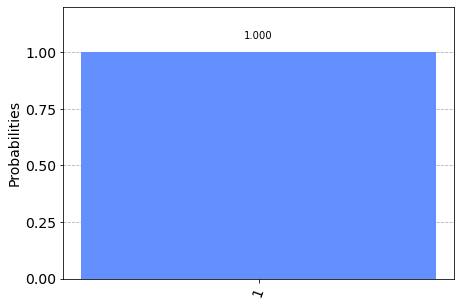

In [181]:
plot_histogram(result.get_counts())